# **Import Library**

In [41]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier  
from scipy.stats import chi2_contingency
import pickle
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## **Load Dataset**

In [2]:
df = pd.read_csv('dataset/kaggle_bot_accounts.csv')

# **Exploratory Data Analysis (EDA)**

## **Peek Top 10 Data**

In [3]:
df.head(10)

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False
5,5,Elijah ParkNeal,Male,mpearson@example.org,False,2.0,2.0,0.0,0.0,0.0,0.62,72.175.201.72,French Polynesia,18.0,9.0,2.0,True
6,6,Logan ZimmermanGallagher,Male,sparkschristy@example.org,NaN,46.0,36.0,0.0,16.0,77.0,22.32,133.206.76.136,South Georgia and the South Sandwich Islands,NaN,9.0,1.0,False
7,7,Erin HerreraKing,Female,NaN,False,2.0,1.0,0.0,0.0,6.0,1.85,39.214.115.81,Antarctica (the territory South of 60 deg S),21.0,3.0,1.0,True
8,8,Matthew RobertsGreer,Male,harrisregina@example.org,True,50.0,25.0,1.0,7.0,122.0,NaN,192.177.30.226,NaN,NaN,7.0,3.0,False
9,9,Michael StoutGraves,Male,klopez@example.net,True,65.0,99.0,7.0,19.0,93.0,8.79,68.230.133.41,Saint Lucia,24.0,7.0,2.0,False


## **Extracting the dataset columns**

In [4]:
df.columns

Index(['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'IS_GLOGIN',
       'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'REGISTRATION_IPV4',
       'REGISTRATION_LOCATION', 'TOTAL_VOTES_GAVE_NB', 'TOTAL_VOTES_GAVE_DS',
       'TOTAL_VOTES_GAVE_DC', 'ISBOT'],
      dtype='object')

`Unnamed: 0` is **useless**, so we'll **drop** it.

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

We'll change the columns name to lowercase for easier maintenance.

In [6]:
df.columns= df.columns.str.lower()

## **Dataset Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   name                   1243024 non-null  object 
 1   gender                 1243309 non-null  object 
 2   email_id               1243374 non-null  object 
 3   is_glogin              1243272 non-null  object 
 4   follower_count         1243476 non-null  float64
 5   following_count        1242743 non-null  float64
 6   dataset_count          1242621 non-null  float64
 7   code_count             1243262 non-null  float64
 8   discussion_count       1243466 non-null  float64
 9   avg_nb_read_time_min   1242872 non-null  float64
 10  registration_ipv4      1242859 non-null  object 
 11  registration_location  1242898 non-null  object 
 12  total_votes_gave_nb    1243483 non-null  float64
 13  total_votes_gave_ds    1243254 non-null  float64
 14  total_votes_gave_d

## **Display The Size 0f The Dataset**


In [8]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1321188, 16)


## **Summary Statistics (Numerical Columns)**

In [9]:
print("\nSummary Statistics (Numerical Columns):")
df.describe()


Summary Statistics (Numerical Columns):


,follower_count,following_count,dataset_count,code_count,discussion_count,avg_nb_read_time_min,total_votes_gave_nb,total_votes_gave_ds,total_votes_gave_dc
count,1.243476e+06,1.242743e+06,1.242621e+06,1.243262e+06,1.243466e+06,1.242872e+06,1.243483e+06,1.243254e+06,1.243158e+06
mean,2.698273e+01,4.505091e+01,2.562564e+00,1.038450e+01,6.584244e+01,1.274225e+01,1.750656e+01,6.501007e+00,1.500373e+00
std,2.300504e+01,3.947716e+01,2.499882e+00,8.248055e+00,4.754315e+01,9.564920e+00,4.611783e+00,2.290951e+00,1.118067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,1.870000e+00,1.400000e+01,5.000000e+00,1.000000e+00
50%,2.400000e+01,3.900000e+01,2.000000e+00,1.000000e+01,6.500000e+01,1.229000e+01,1.800000e+01,7.000000e+00,2.000000e+00
75%,4.700000e+01,8.000000e+01,5.000000e+00,1.800000e+01,1.080000e+02,2.119000e+01,2.200000e+01,9.000000e+00,3.000000e+00
max,7.000000e+01,1.200000e+02,7.000000e+00,2.500000e+01,1.500000e+02,2.999000e+01,2.500000e+01,1.000000e+01,3.000000e+00


## **Summary Statistics (Categorical Columns)**

In [10]:
df.describe(include='object')

,name,gender,email_id,is_glogin,registration_ipv4,registration_location,isbot
count,1243024,1243309,1243374,1243272,1242859,1242898,1242688
unique,1199433,2,603013,2,1242579,243,2
top,David SmithSmith,Male,csmith@example.org,False,195.32.175.129,Korea,False
freq,17,932220,117,788359,2,10128,909794


## **Missing Value Checking**

In [11]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False)

,Missing Values,Percent
dataset_count,78567,5.946693
isbot,78500,5.941622
following_count,78445,5.937459
registration_ipv4,78329,5.928679
avg_nb_read_time_min,78316,5.927695
registration_location,78290,5.925727
name,78164,5.916191
total_votes_gave_dc,78030,5.906048
total_votes_gave_ds,77934,5.898782
code_count,77926,5.898176


## **Target Label Distribution**

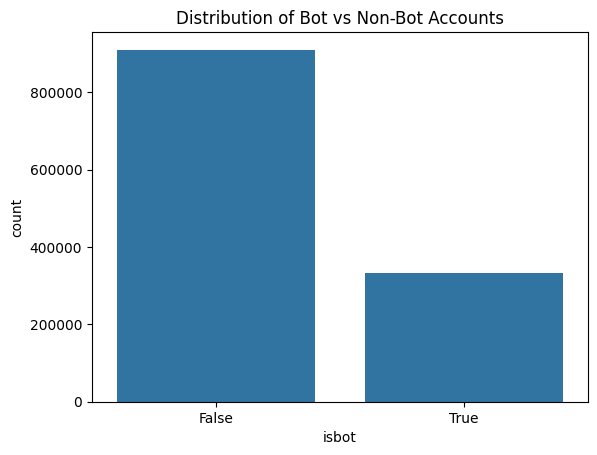

In [12]:
sns.countplot(data=df, x='isbot')
plt.title('Distribution of Bot vs Non-Bot Accounts')
plt.show()

## **Visualize Feature Distributions**

### **Numeric Features**

Numerical Columns: ['follower_count', 'following_count', 'dataset_count', 'code_count', 'discussion_count', 'avg_nb_read_time_min', 'total_votes_gave_nb', 'total_votes_gave_ds', 'total_votes_gave_dc']


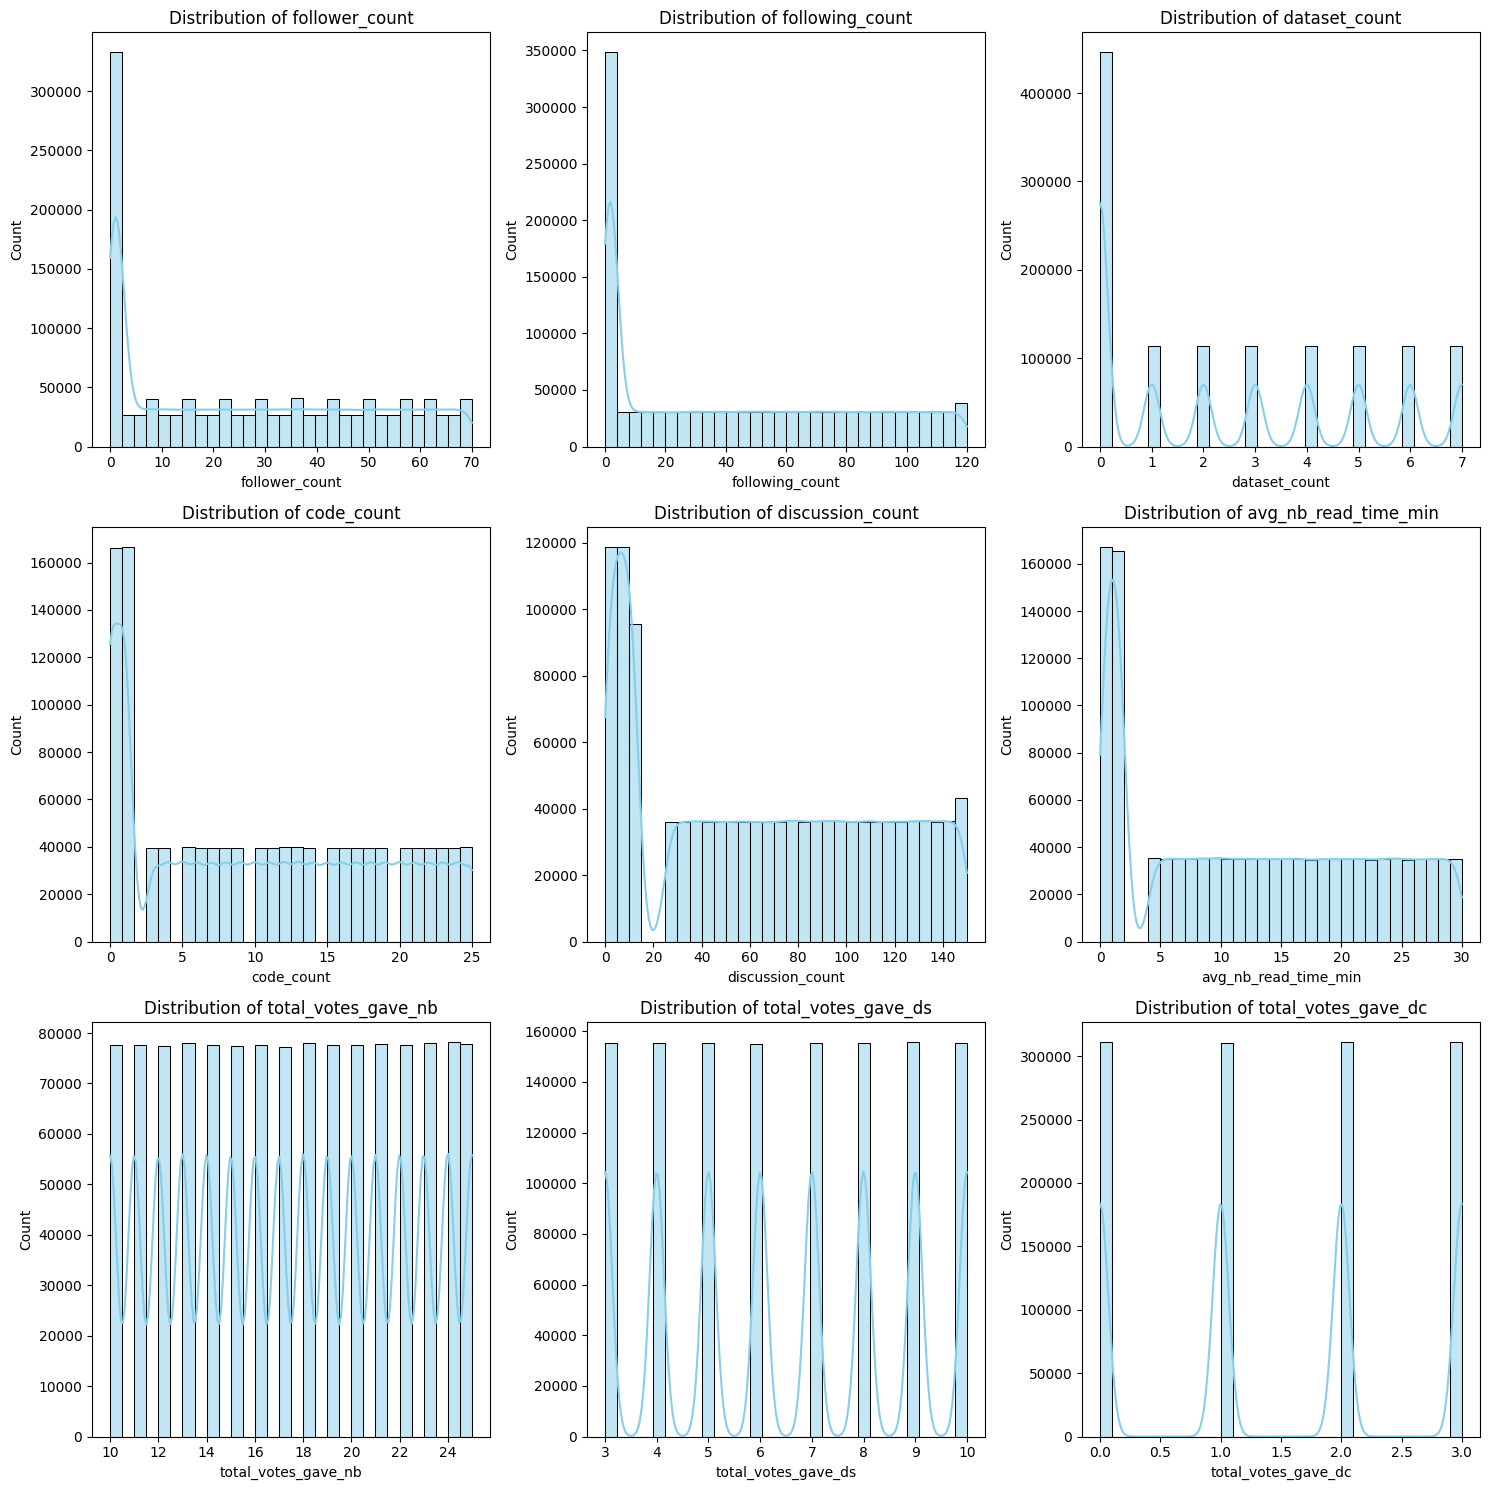

In [13]:
numerical_cols = df.select_dtypes(include=['float64']).columns
print("Numerical Columns:", numerical_cols.tolist())

# Set up the plot grid
n_cols = 3  # Number of columns in the plot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate rows needed
plt.figure(figsize=(15, 5 * n_rows))

# Plot histogram with KDE for each numerical feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### **Categorical Columns**

Categorical Columns: ['NAME', 'GENDER', 'EMAIL_ID', 'REGISTRATION_LOCATION']


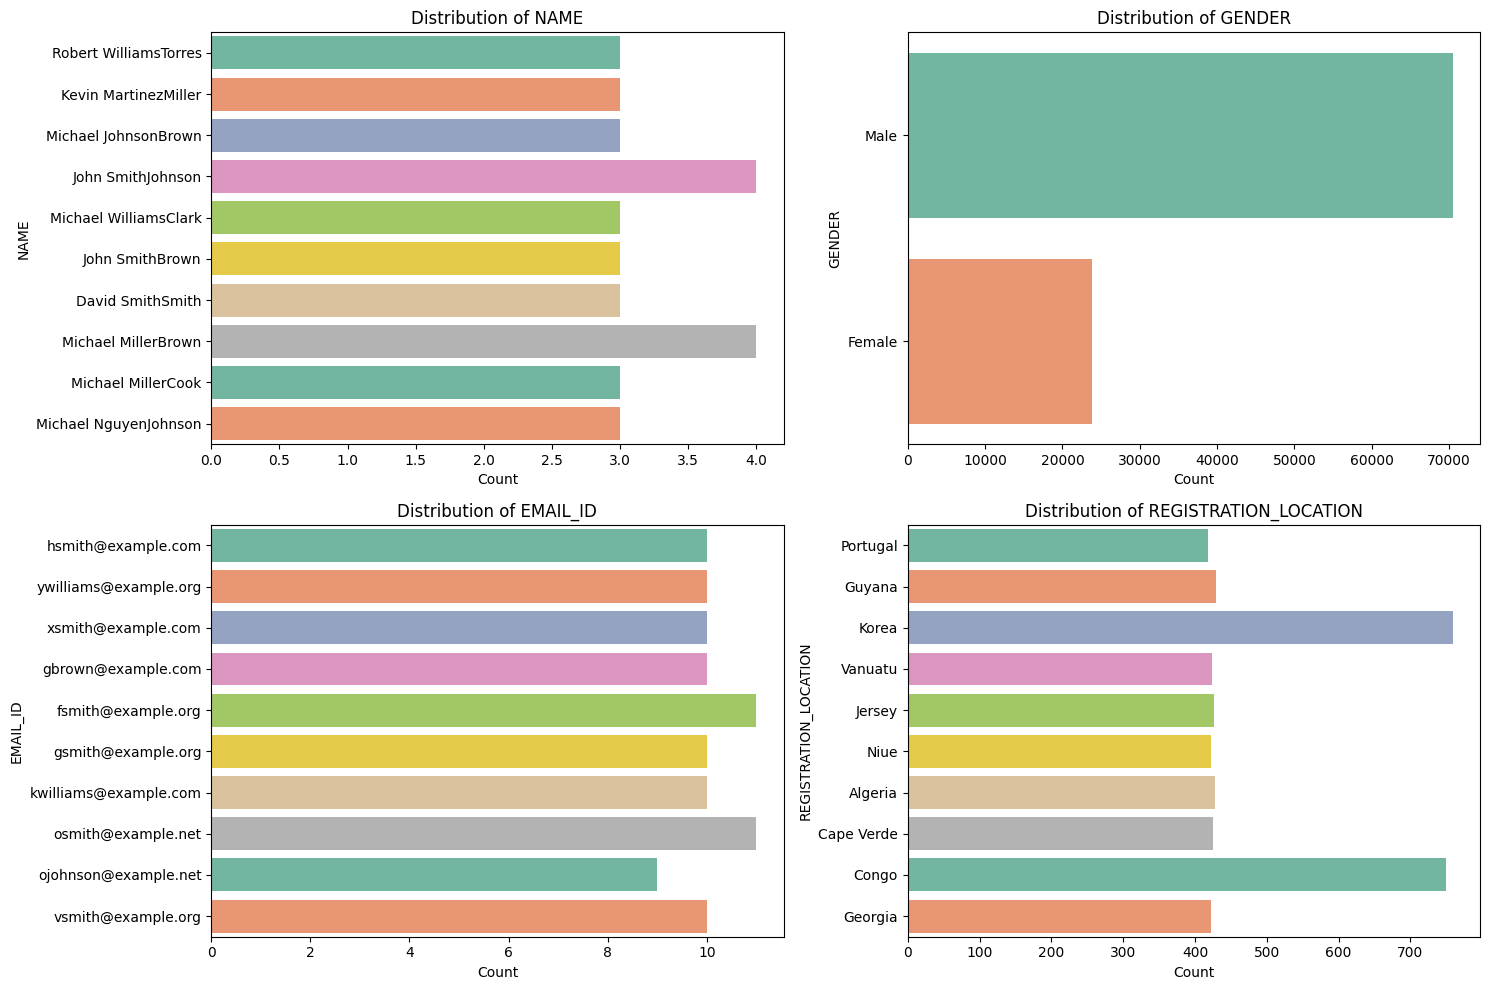

In [14]:
# Tentukan kolom kategorikal yang ingin dimuat (berdasarkan deskripsi dataset)
categorical_cols = ['NAME', 'GENDER', 'EMAIL_ID', 'REGISTRATION_LOCATION']

# Muat hanya sampel acak dari dataset (misalnya, 10% atau 100,000 baris) dan kolom kategorikal
sample_size = 100000  # Sesuaikan dengan kebutuhan dan kapasitas memori
df_sample = pd.read_csv('dataset/kaggle_bot_accounts.csv', usecols=categorical_cols, nrows=sample_size)

# Verifikasi kolom kategorikal
print("Categorical Columns:", categorical_cols)

# Set up plot grid
n_cols = 2  # Jumlah kolom dalam grid
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Hitung jumlah baris
plt.figure(figsize=(15, 5 * n_rows))

# Plot count plot untuk setiap fitur kategorikal
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    # Batasi ke top 10 kategori untuk mempercepat dan menghindari plot yang terlalu padat
    top_categories = df_sample[col].value_counts().index[:10]
    sns.countplot(y=col, data=df_sample[df_sample[col].isin(top_categories)], hue=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend([], [], frameon=False)  # Hapus legenda untuk kejelasan
plt.tight_layout()
plt.show()

## **Outlier Checking**

In [15]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Hitung jumlah outlier per kolom
outlier_counts = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Tampilkan jumlah outlier
print("\nJumlah Outlier per Kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outlier")


Jumlah Outlier per Kolom:
follower_count: 0 outlier
following_count: 0 outlier
dataset_count: 0 outlier
code_count: 0 outlier
discussion_count: 0 outlier
avg_nb_read_time_min: 0 outlier
total_votes_gave_nb: 0 outlier
total_votes_gave_ds: 0 outlier
total_votes_gave_dc: 0 outlier


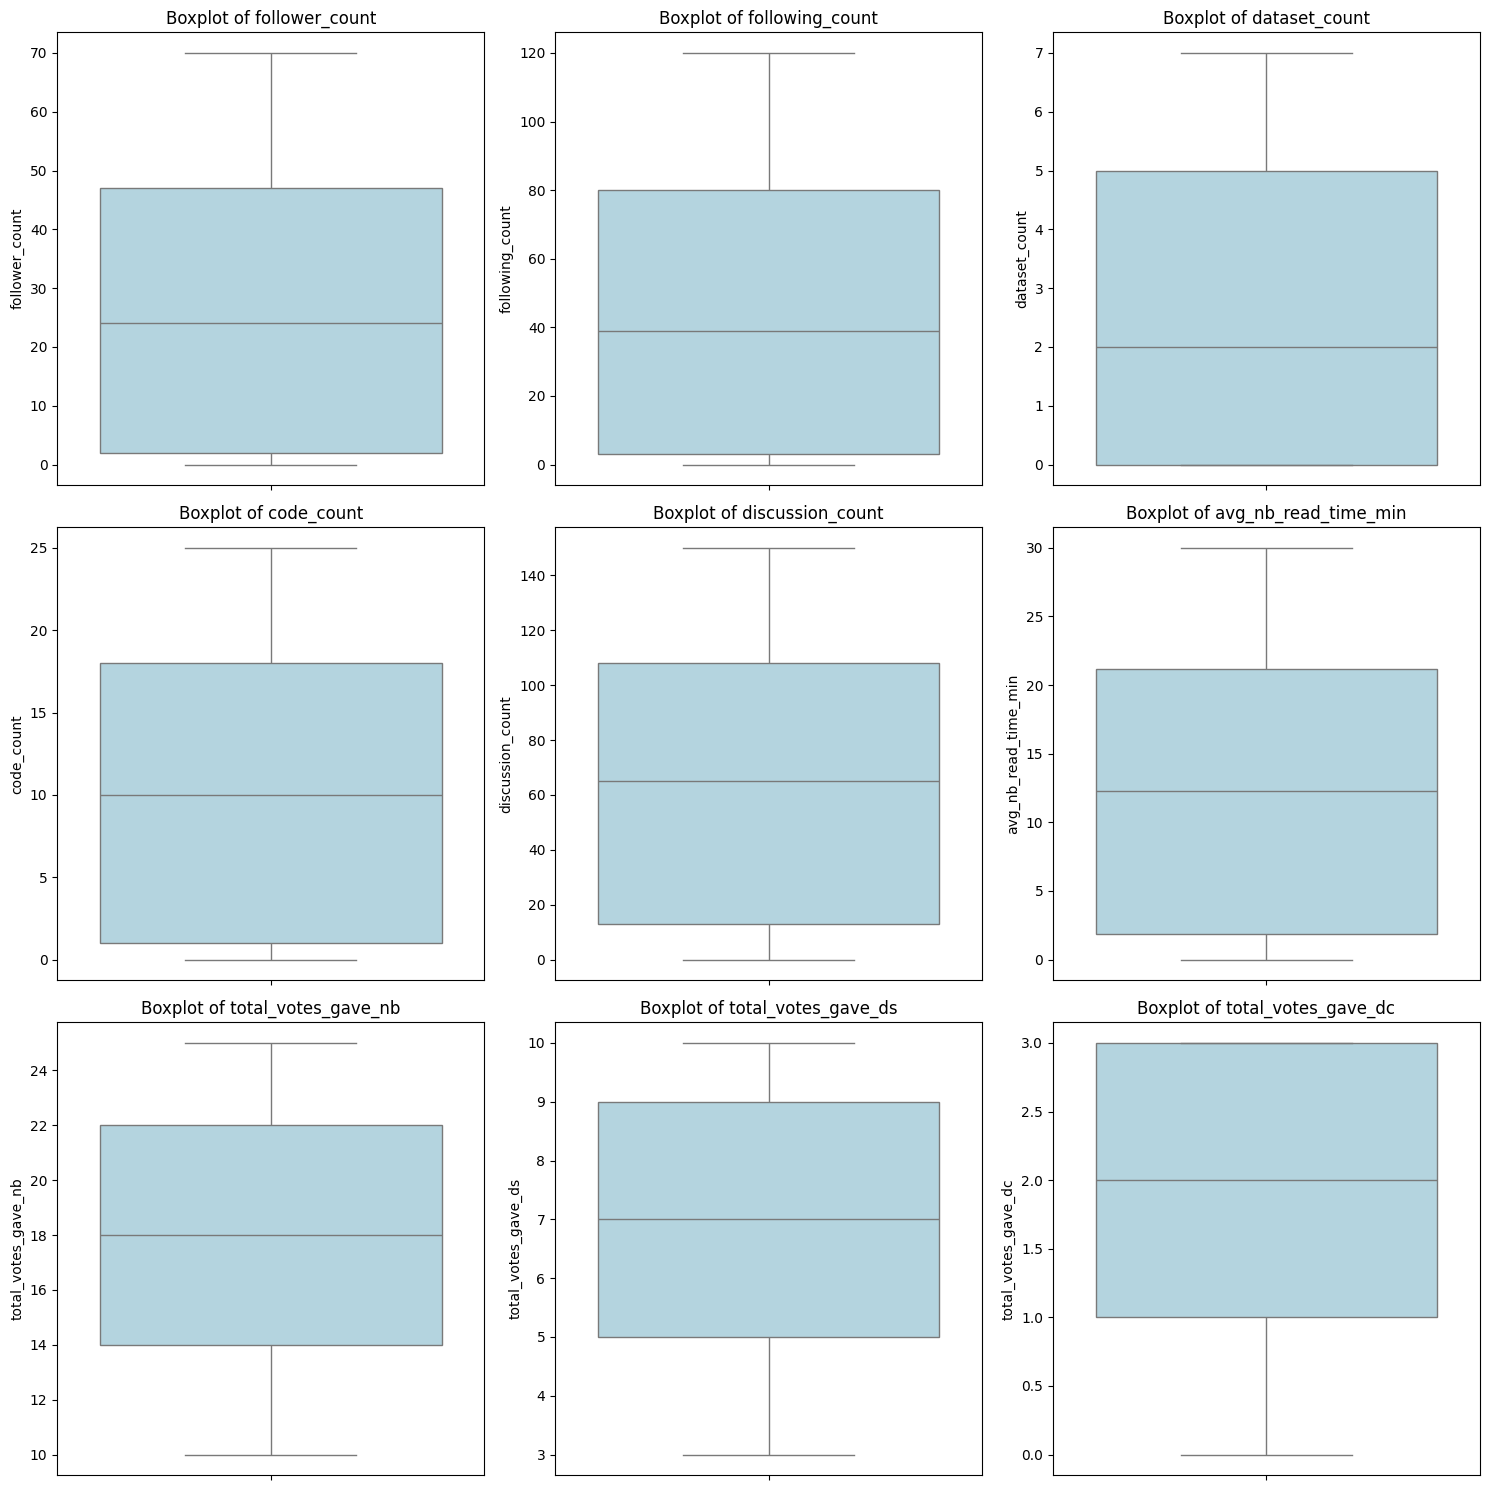

In [16]:
# Atur grid untuk boxplot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Hitung jumlah baris
plt.figure(figsize=(15, 5 * n_rows))

# Buat boxplot untuk setiap kolom numerik
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **Correlation**

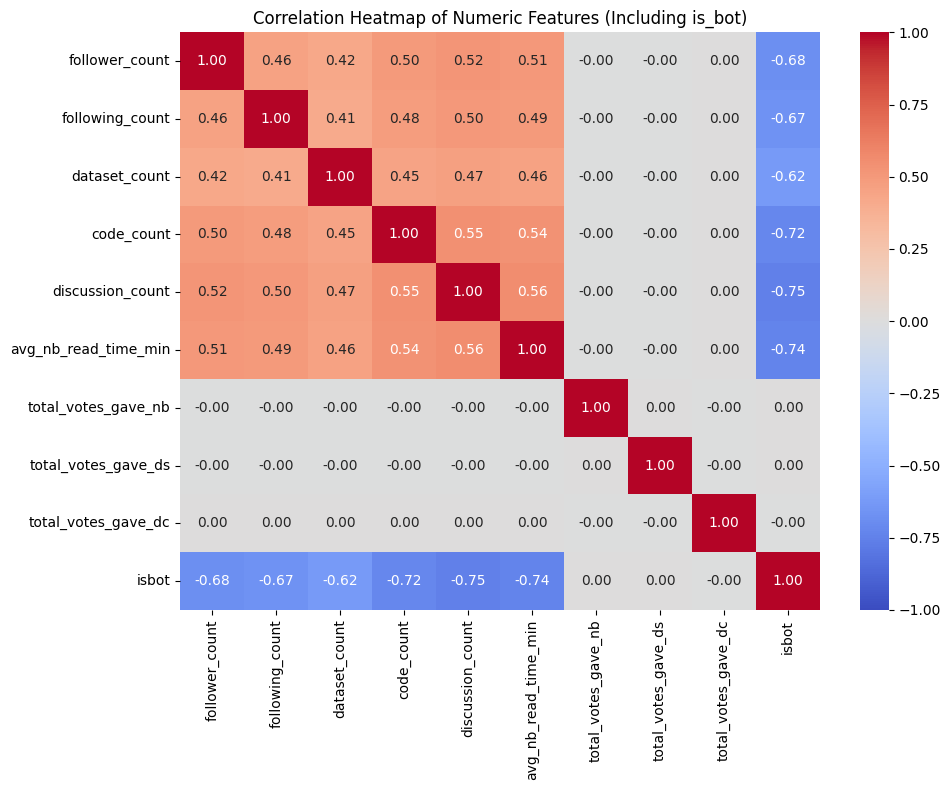

In [17]:
df['isbot'] = df['isbot'].map({True: 1, False: 0})

corr_cols = numerical_cols.tolist() + ['isbot']

correlation_matrix = df[corr_cols].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features (Including is_bot)')
plt.tight_layout()
plt.show()

Cramer's V Correlation of Categorical Features with isbot:
gender: 0.001
is_glogin: 0.460
name: 0.983
email_id: 0.704
registration_location: 0.014


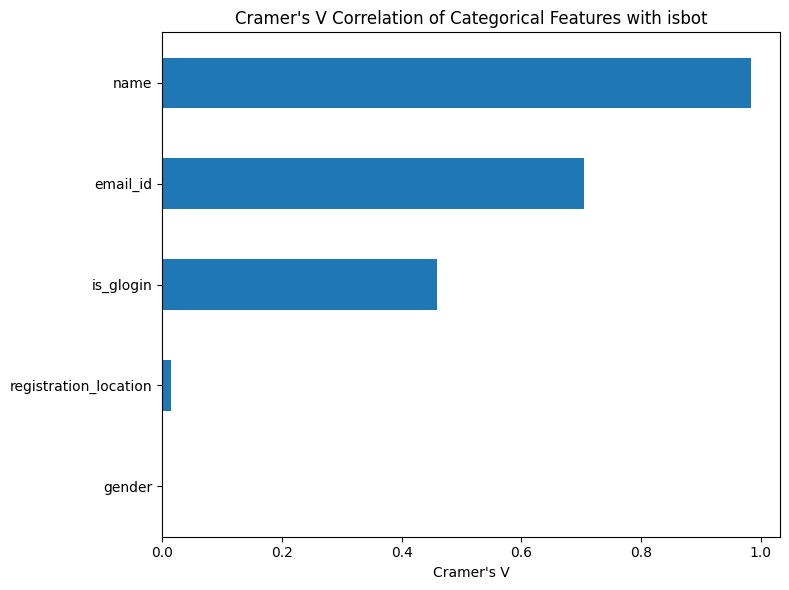

In [18]:
# Fungsi untuk menghitung Cramer's V
def cramers_v(x, y):
    """
    Menghitung Cramer's V untuk mengukur asosiasi antara dua variabel kategorikal.
    
    Parameters:
    x (pd.Series): Variabel kategorikal pertama
    y (pd.Series): Variabel kategorikal kedua (target)
    
    Returns:
    float: Nilai Cramer's V (0 hingga 1)
    """
    # Buat tabel kontingensi
    contingency_table = pd.crosstab(x, y)
    # Hitung chi-squared statistic
    chi2, _, _, _ = chi2_contingency(contingency_table)
    # Jumlah observasi
    n = contingency_table.sum().sum()
    # Jumlah baris dan kolom minimum (dikurangi 1)
    r, k = contingency_table.shape
    phi2 = chi2 / n
    # Rumus Cramer's V
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Definisikan fitur kategorikal
categorical_cols = [
    'gender',
    'is_glogin',
    'name',
    'email_id',
    'registration_location'
]

# Pastikan is_bot ada dalam dataset
target = 'isbot'

# Hitung Cramer's V untuk setiap fitur kategorikal terhadap target
cramers_v_results = {}
for col in categorical_cols:
    cramers_v_value = cramers_v(df[col], df[target])
    cramers_v_results[col] = cramers_v_value

# Tampilkan hasil
print("Cramer's V Correlation of Categorical Features with isbot:")
for col, value in cramers_v_results.items():
    print(f"{col}: {value:.3f}")

# (Opsional) Visualisasi dengan bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
pd.Series(cramers_v_results).sort_values().plot(kind='barh')
plt.title("Cramer's V Correlation of Categorical Features with isbot")
plt.xlabel("Cramer's V")
plt.tight_layout()
plt.show()

# **Data Preprocessing**

## **Dealing with missing values**

In [19]:
df.isnull().sum()

name                     78164
gender                   77879
email_id                 77814
is_glogin                77916
follower_count           77712
following_count          78445
dataset_count            78567
code_count               77926
discussion_count         77722
avg_nb_read_time_min     78316
registration_ipv4        78329
registration_location    78290
total_votes_gave_nb      77705
total_votes_gave_ds      77934
total_votes_gave_dc      78030
isbot                    78500
dtype: int64

In [20]:
def impute_missing_values(df):
    """
    Impute missing values in the dataframe for specified columns.
    Numeric columns are filled with mean, categorical columns with mode.
    
    Parameters:
    df (pd.DataFrame): Input dataframe with lowercase column names
    
    Returns:
    pd.DataFrame: Dataframe with imputed missing values
    """
    # Define columns and their imputation strategy
    imputation_strategy = {
        'total_votes_gave_nb': 'mean',
        'follower_count': 'mean',
        'discussion_count': 'mean',
        'code_count': 'mean',
        'total_votes_gave_ds': 'mean',
        'total_votes_gave_dc': 'mean',
        'avg_nb_read_time_min': 'mean',
        'following_count': 'mean',
        'dataset_count': 'mean',
        'gender': 'mode',
        'is_glogin': 'mode'
    }
    
    # Calculate imputation values
    imputation_values = {}
    for col, strategy in imputation_strategy.items():
        if strategy == 'mean':
            imputation_values[col] = round(df[col].mean()) if col != 'avg_nb_read_time_min' else df[col].mean()
        elif strategy == 'mode':
            imputation_values[col] = df[col].mode()[0]
    
    # Apply imputation using a single fillna call to avoid chained assignment
    df = df.fillna(imputation_values)
    
    return df

In [21]:
df_imputed = impute_missing_values(df)

/tmp/ipykernel_7769/1331263990.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(imputation_values)


In [22]:
df_imputed.isnull().sum()

name                     78164
gender                       0
email_id                 77814
is_glogin                    0
follower_count               0
following_count              0
dataset_count                0
code_count                   0
discussion_count             0
avg_nb_read_time_min         0
registration_ipv4        78329
registration_location    78290
total_votes_gave_nb          0
total_votes_gave_ds          0
total_votes_gave_dc          0
isbot                    78500
dtype: int64

In [23]:
df_imputed.dropna(inplace=True)

## **Feature Selection**

### **Dropping irrelevant columns**

In [24]:
df_imputed.drop("name", axis=1, inplace=True)
df_imputed.drop("email_id", axis=1, inplace=True)
df_imputed.drop("registration_location", axis=1, inplace=True)
df_imputed.drop("registration_ipv4", axis=1, inplace=True)

df['is_glogin'] = df['is_glogin'].astype('object')

### **Selecting features that correlate well with the target**

In [25]:
correlation_threshold = 0.5

target_corr = correlation_matrix['isbot'].drop('isbot')
selected_columns = target_corr[abs(target_corr) > correlation_threshold].index.tolist()

print("Columns that correlate with isbot (abs(correlation) >", correlation_threshold, "):")
print(selected_columns)

Columns that correlate with isbot (abs(correlation) > 0.5 ):
['follower_count', 'following_count', 'dataset_count', 'code_count', 'discussion_count', 'avg_nb_read_time_min']


In [26]:
print("\nNilai korelasi dengan isbot:")
print(target_corr[abs(target_corr) > correlation_threshold])


Nilai korelasi dengan isbot:
follower_count         -0.683228
following_count        -0.667288
dataset_count          -0.619843
code_count             -0.724504
discussion_count       -0.754808
avg_nb_read_time_min   -0.740019
Name: isbot, dtype: float64


In [27]:
df_selected = df_imputed[selected_columns + ['is_glogin', 'isbot']]

In [28]:
df_selected.head(10)

,follower_count,following_count,dataset_count,code_count,discussion_count,avg_nb_read_time_min,is_glogin,isbot
3,23.0,114.0,5.0,24.0,67.0,13.40,True,0.0
4,46.0,112.0,2.0,12.0,63.0,24.83,False,0.0
5,2.0,2.0,0.0,0.0,0.0,0.62,False,1.0
6,46.0,36.0,0.0,16.0,77.0,22.32,False,0.0
9,65.0,99.0,7.0,19.0,93.0,8.79,True,0.0
12,70.0,14.0,5.0,19.0,75.0,12.17,False,0.0
13,49.0,45.0,5.0,25.0,106.0,12.37,False,0.0
14,50.0,15.0,3.0,5.0,58.0,20.95,False,0.0
15,0.0,2.0,0.0,0.0,10.0,1.32,False,1.0
17,55.0,62.0,1.0,3.0,143.0,28.30,True,0.0


## **Dealing With Imbalanced Dataset**

In [29]:
# Calculate counts and percentages
total_accounts = df_selected.shape[0]
bot_count = df_selected[df_selected['isbot'] == True].shape[0]
nonbot_count = df_selected[df_selected['isbot'] == False].shape[0]

bot_percentage = bot_count / total_accounts * 100
nonbot_percentage = nonbot_count / total_accounts * 100

# Display the results
print(f"Total accounts: {total_accounts}")
print(f"Bot accounts: {bot_count} ({bot_percentage:.1f}%)")
print(f"Non-bot accounts: {nonbot_count} ({nonbot_percentage:.1f}%)")


Total accounts: 973661
Bot accounts: 260813 (26.8%)
Non-bot accounts: 712848 (73.2%)


### **Downsampling**

In [30]:
# Separate the dataset into bot and non-bot accounts
bot_accounts = df_selected[df_selected['isbot'] == True]
nonbot_accounts = df_selected[df_selected['isbot'] == False]

# Downsample the majority class (non-bots) to match the minority class (bots)
nonbot_downsampled = resample(
    nonbot_accounts,
    replace=False,           # Sample without replacement
    n_samples=len(bot_accounts),  # Match the number of bot accounts
    random_state=42           # Ensure reproducibility
)

# Combine bot accounts with the downsampled non-bot accounts
balanced_df = pd.concat([bot_accounts, nonbot_downsampled])

# Shuffle the resulting dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

## **Encoding**

In [31]:
le = LabelEncoder()

encoded_df = balanced_df.copy()

encoded_df['is_glogin'] = le.fit_transform(encoded_df['is_glogin'])

In [32]:
encoded_df.head(10)

,follower_count,following_count,dataset_count,code_count,discussion_count,avg_nb_read_time_min,is_glogin,isbot
0,13.0,83.0,1.0,14.0,30.0,12.160000,0,0.0
1,69.0,26.0,1.0,17.0,119.0,18.600000,0,0.0
2,1.0,1.0,0.0,1.0,10.0,0.390000,0,1.0
3,2.0,2.0,0.0,1.0,2.0,12.742246,0,1.0
4,49.0,9.0,4.0,22.0,139.0,12.742246,1,0.0
5,42.0,29.0,3.0,3.0,101.0,7.440000,1,0.0
6,24.0,113.0,4.0,10.0,44.0,19.350000,0,0.0
7,2.0,2.0,0.0,1.0,5.0,1.280000,0,1.0
8,0.0,0.0,0.0,1.0,10.0,12.742246,0,1.0
9,64.0,66.0,4.0,7.0,109.0,8.170000,1,0.0


## **Scaling**

In [33]:
scaler = MinMaxScaler()

scaled_df = encoded_df.copy()

cols_to_scale = [col for col in encoded_df.columns if col not in ['isbot', 'is_glogin']]

scaled_df[cols_to_scale] = scaler.fit_transform(encoded_df[cols_to_scale])

# Verifikasi hasil
print("Kolom di scaled_df:", scaled_df.columns.tolist())
print("\n5 baris pertama dari scaled_df:")

scaled_df.head(5)

Kolom di scaled_df: ['follower_count', 'following_count', 'dataset_count', 'code_count', 'discussion_count', 'avg_nb_read_time_min', 'is_glogin', 'isbot']

5 baris pertama dari scaled_df:


,follower_count,following_count,dataset_count,code_count,discussion_count,avg_nb_read_time_min,is_glogin,isbot
0,0.185714,0.691667,0.142857,0.56,0.200000,0.405468,0,0.0
1,0.985714,0.216667,0.142857,0.68,0.793333,0.620207,0,0.0
2,0.014286,0.008333,0.000000,0.04,0.066667,0.013004,0,1.0
3,0.028571,0.016667,0.000000,0.04,0.013333,0.424883,0,1.0
4,0.700000,0.075000,0.571429,0.88,0.926667,0.424883,1,0.0


# **Modelling**

# **Split Data**

In [34]:
X = scaled_df.drop(columns=['isbot'])
y = scaled_df['isbot'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  
    stratify=y,     
    random_state=42 
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Ukuran X_train: (417300, 7)
Ukuran X_test: (104326, 7)
Ukuran y_train: (417300,)
Ukuran y_test: (104326,)

Distribusi kelas di y_train:
isbot
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Distribusi kelas di y_test:
isbot
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


## **Model Building and Hyperparameter Tuning**

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best ROC-AUC score:  1.0

Best XGBoost Model - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52163
         1.0       1.00      1.00      1.00     52163

    accuracy                           1.00    104326
   macro avg       1.00      1.00      1.00    104326
weighted avg       1.00      1.00      1.00    104326

Best XGBoost Model - ROC-AUC Score: 1.0

Best XGBoost Model - Confusion Matrix:
[[52163     0]
 [    0 52163]]

Feature Importance (Best XGBoost Model):
follower_count          0.492165
discussion_count        0.405399
code_count              0.089188
avg_nb_read_time_min    0.011120
following_count         0.002129
dataset_count           0.000000
is_glogin               0.000000
dtype: float32


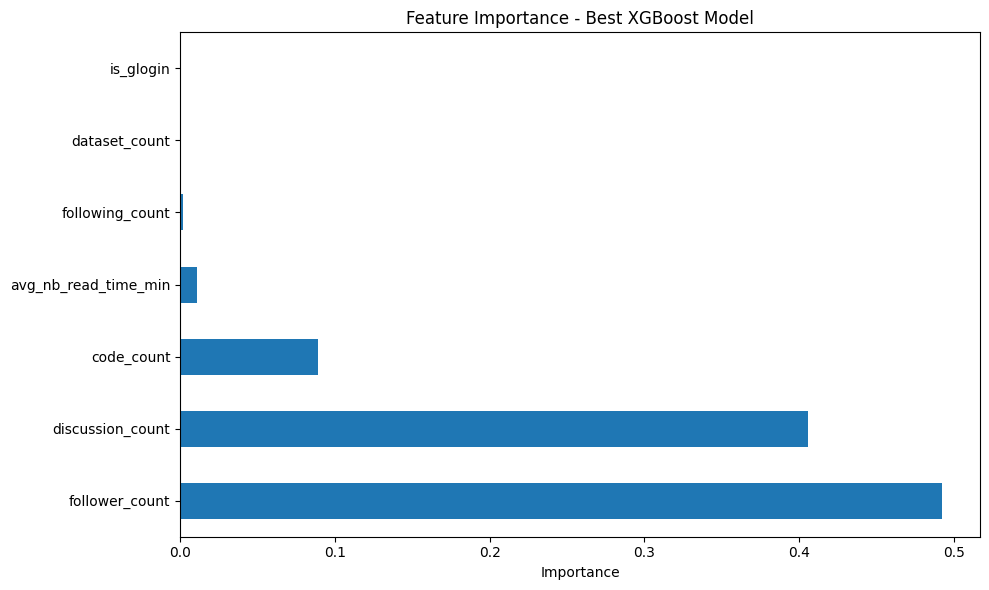

In [35]:
# Definisikan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Buat model dasar
xgb_base = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

# Lakukan hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Metrik untuk optimasi
    verbose=1,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Fit model
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

# Dapatkan model terbaik
best_xgb_model = grid_search.best_estimator_

# Evaluasi model terbaik pada test set
y_pred_best = best_xgb_model.predict(X_test)
y_pred_proba_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Tampilkan hasil evaluasi
print("\nBest XGBoost Model - Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Best XGBoost Model - ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best))
print("\nBest XGBoost Model - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Visualisasi Feature Importance dari model terbaik
feature_importance_best = pd.Series(
    best_xgb_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

print("\nFeature Importance (Best XGBoost Model):")
print(feature_importance_best)

plt.figure(figsize=(10, 6))
feature_importance_best.plot(kind='barh')
plt.title('Feature Importance - Best XGBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# **Cross Validation**

Cross-Validation Results (5-fold):
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1 Score: 1.0000 ± 0.0000
ROC-AUC: 1.0000 ± 0.0000


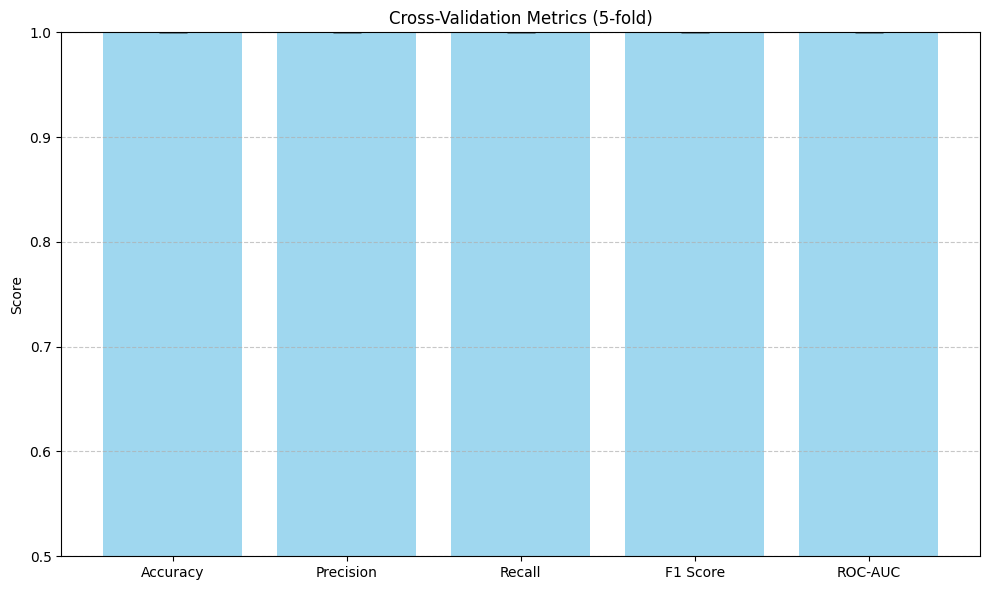

In [39]:
best_xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42,
    eval_metric='logloss'
)

# Definisikan cross-validation method
# Gunakan StratifiedKFold untuk memastikan distribusi kelas yang seimbang pada setiap fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hitung skor cross-validation untuk berbagai metrik
cv_accuracy = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='f1')
cv_roc_auc = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='roc_auc')

# Tampilkan hasil
print("Cross-Validation Results (5-fold):")
print(f"Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# Visualisasi hasil cross-validation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
scores = [cv_accuracy.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean(), cv_roc_auc.mean()]
errors = [cv_accuracy.std(), cv_precision.std(), cv_recall.std(), cv_f1.std(), cv_roc_auc.std()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, yerr=errors, alpha=0.8, capsize=10, color='skyblue')
plt.ylim(0.5, 1.0)  # Sesuaikan range y jika diperlukan
plt.title('Cross-Validation Metrics (5-fold)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Latih model final dengan seluruh dataset
final_model = best_xgb_model.fit(X, y)

# **Save Model**

In [40]:
with open('model/xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

print("Model final telah disimpan ke model/xgboost_model.pkl")

Model final telah disimpan ke model/xgboost_model.pkl
